In [16]:
#Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl
import statistics as stats
from sklearn.linear_model import LinearRegression

## Carga y visualización de Archivos

In [2]:
#Carga de archivos
mex = pd.read_csv("DF_Mexico.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
mex.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2056638,https://www.airbnb.com/rooms/2056638,20230329041210,2023-03-30,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,NaN,https://a0.muscache.com/pictures/28353712/4379...,10531228,https://www.airbnb.com/users/show/10531228,Maria,2013-12-09,"Mexico City, Mexico",NaN,within a day,100%,NaN,f,https://a0.muscache.com/im/users/10531228/prof...,https://a0.muscache.com/im/users/10531228/prof...,Coyoacán,3,7,['phone'],t,f,NaN,Coyoacán,NaN,19.35353,-99.16299,Entire loft,Entire home/apt,3,NaN,1.5 baths,1.0,1.0,"[""Wifi"", ""Hangers"", ""Fire extinguisher"", ""Sham...","$1,434.00",1,1125,1.0,1.0,1125.0,1125.0,1.0,1125.0,NaN,t,0,19,49,324,2023-03-30,21,0,0,2014-01-03,2018-06-24,4.95,4.71,4.95,5.00,4.95,5.00,4.86,NaN,f,3,3,0,0,0.19
1,2072354,https://www.airbnb.com/rooms/2072354,20230329041210,2023-03-30,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,16840050,https://www.airbnb.com/users/show/16840050,Mónica,2014-06-16,"Mexico City, Mexico",NaN,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/635c8...,https://a0.muscache.com/im/pictures/user/635c8...,NaN,3,3,"['email', 'phone']",t,t,"Mexico City, Federal District, Mexico",Coyoacán,NaN,19.35358,-99.16948,Entire guest suite,Entire home/apt,2,NaN,1 bath,1.0,1.0,"[""Free street parking"", ""Cleaning products"", ""...",$830.00,3,1125,3.0,3.0,1125.0,1125.0,3.0,1125.0,NaN,t,11,41,71,346,2023-03-30,61,1,0,2014-01-01,2022-11-04,4.85,4.90,4.88,4.93,5.00,4.95,4.84,NaN,f,2,2,0,0,0.54
2,696037,https://www.airbnb.com/rooms/696037,20230329041210,2023-03-29,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,3531879,https://www.airbnb.com/users/show/3531879,Gonzalo & Sandra,2012-09-10,"Mexico City, Mexico",We are from CDMX and moved back and forth to N...,within an hour,100%,90%,t,https://a0.muscache.com/im/users/3531879/profi...,https://a0.muscache.com/im/users/3531879/profi...,Centro Histórico,4,4,"['email', 'phone']",t,t,"Mexico City, Federal District, Mexico",Miguel Hidalgo,NaN,19.44180,-99.18402,Entire rental unit,Entire home/apt,6,NaN,2 baths,3.0,3.0,"[""Wifi \u2013 38 Mbps"", ""Central air condition...","$1,469.00",24,1125,24.0,24.0,1125.0,1125.0,24.0,1125.0,NaN,t,0,0,0,87,2023-03-29,39,2,0,2012-10-31,2022-12-21,4.57,4.82,4.71,4.92,4.92,4.58,4.71,NaN,f,3,3,0,0,0.31
3,35797,https://www.airbnb.com/rooms/35797,20230329041210,2023-03-2

In [3]:
mex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            24224 non-null  int64  
 1   listing_url                                   24224 non-null  object 
 2   scrape_id                                     24224 non-null  int64  
 3   last_scraped                                  24224 non-null  object 
 4   source                                        24224 non-null  object 
 5   name                                          24223 non-null  object 
 6   description                                   23296 non-null  object 
 7   neighborhood_overview                         15145 non-null  object 
 8   picture_url                                   24224 non-null  object 
 9   host_id                                       24224 non-null 

### Valores Nulos

#### Visualización

In [4]:
mex.isnull().sum().sum()

189609

In [5]:
mex.isnull().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
source                                              0
name                                                1
description                                       928
neighborhood_overview                            9079
picture_url                                         0
host_id                                             0
host_url                                            0
host_name                                           0
host_since                                          0
host_location                                    5172
host_about                                      10664
host_response_time                               3091
host_response_rate                               3091
host_acceptance_rate                             2043
host_is_superhost           

Tratamiento de Nulos
* String
    * "No Information About"
        * name
        * description
        * neighborhood_overview
        * host_location
        * host_about
        * host_response_time
        * host_neighbourhood
        * neighbourhood
        
    * "00/00/0000"
        * first_review
        * last_review
    * "W0"
        * host_is_superhost


* Mediana
    * bedrooms
    * beds
    * minimum_minimum_nights
    * maximum_minimum_nights
    * minimum_maximum_nights
    * maximum_maximum_nights
    * review_scores_value


* Media
    * maximum_maximum_nights
    * maximum_nights_avg_ntm
    * review_scores_rating
    * review_scores_accuracy
    * review_scores_cleanliness
    * review_scores_checkin
    * review_scores_communication
    * review_scores_location
    * review_scores_value
    * reviews_per_month
    * host_acceptance_rate
    * host_response_rate
    * bathrooms_text


* Eliminar columnas
    * neighbourhood_group_cleansed
    * bathrooms
    * calendar_updated
    * license

In [6]:
#Copia de Data Frame
mex2 = mex.copy()

In [7]:
#String 
    #No info
columnas_rellenar_no_info = ["name", "description", "neighborhood_overview", "host_location", "host_about", "host_response_time", "host_neighbourhood", "neighbourhood"]
mex2[columnas_rellenar_no_info] = mex2[columnas_rellenar_no_info].fillna("No information about")

In [8]:
#String
    #00/00/0000
mex2["first_review"] = mex2["first_review"].fillna("00/00/0000")
mex2["last_review"] = mex2["last_review"].fillna("00/00/0000")

In [9]:
#String 
    #Clave
mex2["host_is_superhost"] = mex2["host_is_superhost"].fillna("W0")

In [10]:
#Verificar nulos
mex2.isnull().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
source                                              0
name                                                0
description                                         0
neighborhood_overview                               0
picture_url                                         0
host_id                                             0
host_url                                            0
host_name                                           0
host_since                                          0
host_location                                       0
host_about                                          0
host_response_time                                  0
host_response_rate                               3091
host_acceptance_rate                             2043
host_is_superhost           

In [11]:
#Mediana
columnas_rellenar_mediana = ["bedrooms", "beds", "review_scores_value", "minimum_minimum_nights", "maximum_minimum_nights", "minimum_maximum_nights", "maximum_maximum_nights"]
mex2[columnas_rellenar_mediana] = mex2[columnas_rellenar_mediana].fillna(mex[columnas_rellenar_mediana].median())

In [12]:
#Verificamos nulos
mex2.isnull().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
source                                              0
name                                                0
description                                         0
neighborhood_overview                               0
picture_url                                         0
host_id                                             0
host_url                                            0
host_name                                           0
host_since                                          0
host_location                                       0
host_about                                          0
host_response_time                                  0
host_response_rate                               3091
host_acceptance_rate                             2043
host_is_superhost           

Problemas con la variable Host_acceptance_rate, host_response_rate, bathrooms text:

Nos cambió los NAs por 0s, por lo que en la siguiente línea no nos permite cambiarlos por la media porque ya hay un dato. Se propone hacer una limpieza de esta columna:

* Hacer una nueva base con solo esta columna
* Quitar "%"
* Calcular media
* Directamente cambiar en la columna del data frame con el valor de la media exacto, es decir, si la media fue 67, usar la línea:

    mex2["host_acceptance_rate"] = mex2["host_acceptance_rate"].fillna(67)
    
* Cambiarlo a int en caso de ser necesario.

In [13]:
#HOST_ACCEPTANCE_RATE
#Se crea el nuevo df, se quita % y se pasa a float
host_acceptance_rate_df = mex.iloc[ : , [17]]
host_acceptance_rate_df = host_acceptance_rate_df["host_acceptance_rate"].str.replace("%", "").astype(float)
host_acceptance_rate_df.head()

0     NaN
1     NaN
2    90.0
3     NaN
4    86.0
Name: host_acceptance_rate, dtype: float64

In [18]:
#Calcular media quitando NAs
host_acceptance_rate_df = host_acceptance_rate_df.dropna()
print(stats.mean(host_acceptance_rate_df))

91.45624633695505


In [19]:
#Lo cambiamos en nuestro data frame original
mex2["host_acceptance_rate"] = mex2["host_acceptance_rate"].str.replace("%", "").astype(float)
mex2["host_acceptance_rate"] = mex2["host_acceptance_rate"].fillna(91.45)

In [20]:
#HOST_RESPONSE_RATE
#Se crea el nuevo df, se quita % y se pasa a float
host_response_rate_df = mex.iloc[ : , [16]]
host_response_rate_df = host_response_rate_df["host_response_rate"].str.replace("%", "").astype(float)
host_response_rate_df.head()

0    100.0
1      NaN
2    100.0
3      NaN
4    100.0
Name: host_response_rate, dtype: float64

In [21]:
#Calcular media quitando NAs
host_response_rate_df = host_response_rate_df.dropna()
print(stats.mean(host_response_rate_df))

94.53877821416742


In [22]:
#Lo cambiamos en nuestro data frame original
mex2["host_response_rate"] = mex2["host_response_rate"].str.replace("%", "").astype(float)
mex2["host_response_rate"] = mex2["host_response_rate"].fillna(94.53)

In [23]:
#BATHROOMS_TEXT
# #Se crea el nuevo df, se quita % y se pasa a float
# bathrooms_text_df = mex.iloc[ : , [36]]
# bathrooms_text_df = bathrooms_text_df["bathrooms_text"].replace({"bath":"", "s":"", " ":"", "hared":"", "private":"", "Half-":"", "\"":""}, regex = True)
# bathrooms_text_df = bathrooms_text_df.str.replace("\"", "")
# bathrooms_text_df = bathrooms_text_df.astype(float)
# # def convert_to_float(value):
# #     try:
# #         return float(value)
# #     except ValueError:
#         return None

# bathrooms_text_df = bathrooms_text_df.apply(convert_to_float)

# bathrooms_text_df

In [24]:
# #Calcular media quitando NAs
# bathrooms_text_df = bathrooms_text_df.dropna()
# print(stats.mean(bathrooms_text_df))

In [25]:
#Media
columnas_rellenar_media = ["maximum_maximum_nights", "maximum_nights_avg_ntm", "review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value", "reviews_per_month", "minimum_nights_avg_ntm"]
mex2[columnas_rellenar_media] = mex2[columnas_rellenar_media].fillna(mex[columnas_rellenar_media].mean())

In [26]:
#Verificamos nulos
mex2.isnull().sum()

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
source                                              0
name                                                0
description                                         0
neighborhood_overview                               0
picture_url                                         0
host_id                                             0
host_url                                            0
host_name                                           0
host_since                                          0
host_location                                       0
host_about                                          0
host_response_time                                  0
host_response_rate                                  0
host_acceptance_rate                                0
host_is_superhost           

In [27]:
#Eliminar columnas
    #neighbourhood_group_cleansed
    #bathrooms
    #calendar_updated
    #license

mex2 = mex2.drop(["neighbourhood_group_cleansed", "bathrooms", "calendar_updated", "license"], axis=1)

In [28]:
#Verificamos nulos
mex2.isnull().sum()

id                                               0
listing_url                                      0
scrape_id                                        0
last_scraped                                     0
source                                           0
name                                             0
description                                      0
neighborhood_overview                            0
picture_url                                      0
host_id                                          0
host_url                                         0
host_name                                        0
host_since                                       0
host_location                                    0
host_about                                       0
host_response_time                               0
host_response_rate                               0
host_acceptance_rate                             0
host_is_superhost                                0
host_thumbnail_url             

In [29]:
#Quitamos signo de pesos $ a price
mex2["price"] = mex2["price"].str.replace("$", "")
mex2["price"] = mex2["price"].replace({",":""}, regex = True).astype(float)
mex2["price"].head()

0     1434.0
1      830.0
2     1469.0
3     3658.0
4    18000.0
Name: price, dtype: float64

In [30]:
#Verificamos nulos completos
mex2.isnull().sum().sum()

30

### Valores atípicos

#### División de cuantitativos
 16  host_response_rate
 
 17  host_acceptance_rate

 22  host_listings_count                             
 23  host_total_listings_count                       

 33  accommodates                                   

 35  bedrooms                                       
 36  beds                                           

 39  minimum_nights                                  
 40  maximum_nights                                  
 41  minimum_minimum_nights                         
 42  maximum_minimum_nights                         
 43  minimum_maximum_nights                         
 44  maximum_maximum_nights                         
 45  minimum_nights_avg_ntm                         
 46  maximum_nights_avg_ntm                         

 48  availability_30                                 
 49  availability_60                                 
 50  availability_90                                 
 51  availability_365                               

 53  number_of_reviews                             
 54  number_of_reviews_ltm                         
 55  number_of_reviews_l30d                        

 58  review_scores_rating                          
 59  review_scores_accuracy                        
 60  review_scores_cleanliness                     
 61  review_scores_checkin                         
 62  review_scores_communication                   
 63  review_scores_location                        
 64  review_scores_value                           
 
 66  calculated_host_listings_count                
 67  calculated_host_listings_count_entire_homes   
 68  calculated_host_listings_count_private_rooms  
 69  calculated_host_listings_count_shared_rooms   
 70  reviews_per_month  


Price no porque no son outliers 

In [31]:
#Cuantitativas
cuan0 = mex2.iloc[ : , [16,17]]
cuan1 = mex2.iloc[ : , [22,23]] 
cuan2 = mex2.iloc[ : , [33]]
cuan3 = mex2.iloc[ : , [35,36]]
cuan4 = mex2.iloc[ : , 39:47]   
cuan5 = mex2.iloc[ : , 48:52] 
cuan6 = mex2.iloc[ : , 53:56]
cuan7 = mex2.iloc[ : , 58:64]
cuan8 = mex2.iloc[ : , 66:71]
cuanti_mex = pd.concat([cuan0, cuan1, cuan2, cuan3, cuan4, cuan5, cuan6, cuan7, cuan8], axis=1)
cuanti_mex.columns

Index(['host_response_rate', 'host_acceptance_rate', 'host_listings_count',
       'host_total_listings_count', 'accommodates', 'bedrooms', 'beds',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object')

In [32]:
columnas_a_eliminar = cuanti_mex.columns
cuali_mex = mex2.drop(columns=columnas_a_eliminar)
cuali_mex.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type',
       'room_type', 'bathrooms_text', 'amenities', 'price', 'has_availability',
       'calendar_last_scraped', 'first_review', 'last_review',
       'review_scores_value', 'instant_bookable'],
      dtype='object')

In [33]:
#Visualizamos info de nuevo df
cuanti_mex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 33 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_response_rate                            24224 non-null  float64
 1   host_acceptance_rate                          24224 non-null  float64
 2   host_listings_count                           24224 non-null  int64  
 3   host_total_listings_count                     24224 non-null  int64  
 4   accommodates                                  24224 non-null  int64  
 5   bedrooms                                      24224 non-null  float64
 6   beds                                          24224 non-null  float64
 7   minimum_nights                                24224 non-null  int64  
 8   maximum_nights                                24224 non-null  int64  
 9   minimum_minimum_nights                        24224 non-null 

#### Visualización de valores atípicos

<Figure size 1500x800 with 0 Axes>

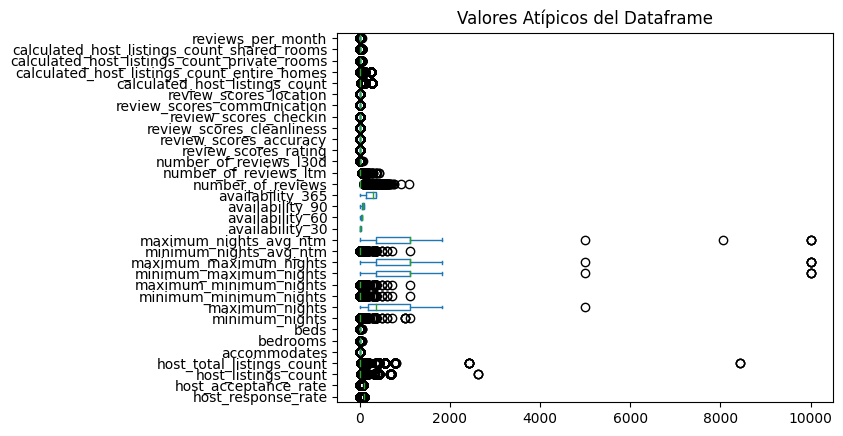

In [34]:
fig = plt.figure(figsize =(15, 8))
cuanti_mex.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show()

#### Tratamiento de Outliers
Por rango intercuartilico

In [35]:
#Tratamiento con desviación estándar
    #Marcamos límites
y = cuanti_mex
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido host_response_rate                               145.481643
host_acceptance_rate                             151.183671
host_listings_count                              252.830274
host_total_listings_count                        426.203015
accommodates                                       9.933140
bedrooms                                           4.967931
beds                                               6.934289
minimum_nights                                    84.914542
maximum_nights                                  2018.371832
minimum_minimum_nights                            74.570464
maximum_minimum_nights                            75.639955
minimum_maximum_nights                          2164.914446
maximum_maximum_nights                          2164.364207
minimum_nights_avg_ntm                            74.890171
maximum_nights_avg_ntm                          2159.176276
availability_30                                   49.824183
availability_6

In [36]:
#Observamos valores atípicos del data frame
outliers_cuan_mex= cuanti_mex[(y>Limite_Superior)|(y<Limite_Inferior)]
outliers_cuan_mex.head()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,14.0,5.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
#Hacemos el cambio a un nuevo data frame
cuanti_mex_limpio_out = cuanti_mex[(y<=Limite_Superior)&(y>=Limite_Inferior)]
cuanti_mex_limpio_out.head()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,100.00,91.45,3.0,7.0,3.0,1.0,1.0,1.0,1125.0,1.0,1.0,1125.0,1125.0,1.0,1125.0,0,19,49,324,21.0,0.0,0.0,4.950000,4.71000,4.950000,5.000000,4.950000,5.000000,3.0,3.0,0.0,0.0,0.190000
1,94.53,91.45,3.0,3.0,2.0,1.0,1.0,3.0,1125.0,3.0,3.0,1125.0,1125.0,3.0,1125.0,11,41,71,346,61.0,1.0,0.0,4.850000,4.90000,4.880000,4.930000,5.000000,4.950000,2.0,2.0,0.0,0.0,0.540000
2,100.00,90.00,4.0,4.0,6.0,3.0,3.0,24.0,1125.0,24.0,24.0,1125.0,1125.0,24.0,1125.0,0,0,0,87,39.0,2.0,0.0,4.570000,4.82000,4.710000,4.920000,4.920000,4.580000,3.0,3.0,0.0,0.0,0.310000
3,94.53,91.45,1.0,1.0,2.0,1.0,1.0,1.0,7.0,1.0,1.0,7.0,7.0,1.0,7.0,28,58,88,363,0.0,0.0,0.0,4.717754,4.77761,4.746342,4.827133,4.815533,4.832627,1.0,1.0,0.0,0.0,1.702435
4,100.00,86.00,16.0,16.0,NaN,NaN,NaN,1.0,365.0,1.0,1.0,365.0,365.0,1.0,365.0,30,59,89,357,64.0,12.0,1.0,4.580000,4.56000,4.700000,4.870000,4.780000,4.980000,12.0,3.0,2.0,0.0,0.460000


In [38]:
#Vemos valores nulos
cuanti_mex_limpio_out.isnull().sum()

host_response_rate                              716
host_acceptance_rate                            847
host_listings_count                             521
host_total_listings_count                       489
accommodates                                    537
bedrooms                                        299
beds                                            379
minimum_nights                                  178
maximum_nights                                    1
minimum_minimum_nights                          173
maximum_minimum_nights                          176
minimum_maximum_nights                            5
maximum_maximum_nights                            6
minimum_nights_avg_ntm                          174
maximum_nights_avg_ntm                            6
availability_30                                   0
availability_60                                   0
availability_90                                   0
availability_365                                  0
number_of_re

In [39]:
#Cambiamos nuevo nulos a media
cuanti_mex_limpio_out_mean = cuanti_mex_limpio_out.copy()
cuanti_mex_limpio_out_mean = cuanti_mex_limpio_out.fillna(cuanti_mex_limpio_out.mean())
cuanti_mex_limpio_out_mean.head()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,100.00,91.45,3.0,7.0,3.00000,1.000000,1.000000,1.0,1125.0,1.0,1.0,1125.0,1125.0,1.0,1125.0,0,19,49,324,21.0,0.0,0.0,4.950000,4.71000,4.950000,5.000000,4.950000,5.000000,3.0,3.0,0.0,0.0,0.190000
1,94.53,91.45,3.0,3.0,2.00000,1.000000,1.000000,3.0,1125.0,3.0,3.0,1125.0,1125.0,3.0,1125.0,11,41,71,346,61.0,1.0,0.0,4.850000,4.90000,4.880000,4.930000,5.000000,4.950000,2.0,2.0,0.0,0.0,0.540000
2,100.00,90.00,4.0,4.0,6.00000,3.000000,3.000000,24.0,1125.0,24.0,24.0,1125.0,1125.0,24.0,1125.0,0,0,0,87,39.0,2.0,0.0,4.570000,4.82000,4.710000,4.920000,4.920000,4.580000,3.0,3.0,0.0,0.0,0.310000
3,94.53,91.45,1.0,1.0,2.00000,1.000000,1.000000,1.0,7.0,1.0,1.0,7.0,7.0,1.0,7.0,28,58,88,363,0.0,0.0,0.0,4.717754,4.77761,4.746342,4.827133,4.815533,4.832627,1.0,1.0,0.0,0.0,1.702435
4,100.00,86.00,16.0,16.0,3.06683,1.467503,1.827888,1.0,365.0,1.0,1.0,365.0,365.0,1.0,365.0,30,59,89,357,64.0,12.0,1.0,4.580000,4.56000,4.700000,4.870000,4.780000,4.980000,12.0,3.0,2.0,0.0,0.460000


<Figure size 1500x800 with 0 Axes>

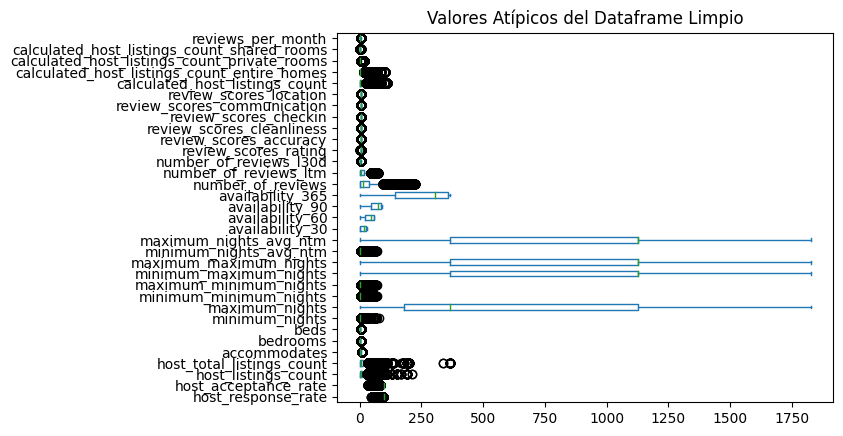

In [40]:
#Volvemos a observar en diagrama de cajas
fig = plt.figure(figsize =(15, 8))
cuanti_mex_limpio_out_mean.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe Limpio")
plt.show()

Juntamos los dos data frames

In [41]:
mex3 = pd.concat([cuanti_mex_limpio_out_mean, cuali_mex], axis = 1)
mex3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24224 entries, 0 to 24223
Data columns (total 71 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_response_rate                            24224 non-null  float64
 1   host_acceptance_rate                          24224 non-null  float64
 2   host_listings_count                           24224 non-null  float64
 3   host_total_listings_count                     24224 non-null  float64
 4   accommodates                                  24224 non-null  float64
 5   bedrooms                                      24224 non-null  float64
 6   beds                                          24224 non-null  float64
 7   minimum_nights                                24224 non-null  float64
 8   maximum_nights                                24224 non-null  float64
 9   minimum_minimum_nights                        24224 non-null 

### Extracción de Datos

In [42]:
#a) host_acceptance_rate> 50%
host_acceptance_rate = mex3[(mex3["host_acceptance_rate"] > 50)]
host_acceptance_rate.head()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,review_scores_value,instant_bookable
0,100.00,91.45,3.0,7.0,3.00000,1.000000,1.000000,1.0,1125.0,1.0,1.0,1125.0,1125.0,1.0,1125.0,0,19,49,324,21.0,0.0,0.0,4.950000,4.71000,4.950000,5.000000,4.950000,5.000000,3.0,3.0,0.0,0.0,0.190000,2056638,https://www.airbnb.com/rooms/2056638,20230329041210,2023-03-30,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,No information about,https://a0.muscache.com/pictures/28353712/4379...,10531228,https://www.airbnb.com/users/show/10531228,Maria,2013-12-09,"Mexico City, Mexico",No information about,within a day,f,https://a0.muscache.com/im/users/10531228/prof...,https://a0.muscache.com/im/users/10531228/prof...,Coyoacán,['phone'],t,f,No information about,Coyoacán,19.35353,-99.16299,Entire loft,Entire home/apt,1.5 baths,"[""Wifi"", ""Hangers"", ""Fire extinguisher"", ""Sham...",1434.0,t,2023-03-30,2014-01-03,2018-06-24,4.86,f
1,94.53,91.45,3.0,3.0,2.00000,1.000000,1.000000,3.0,1125.0,3.0,3.0,1125.0,1125.0,3.0,1125.0,11,41,71,346,61.0,1.0,0.0,4.850000,4.90000,4.880000,4.930000,5.000000,4.950000,2.0,2.0,0.0,0.0,0.540000,2072354,https://www.airbnb.com/rooms/2072354,20230329041210,2023-03-30,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,16840050,https://www.airbnb.com/users/show/16840050,Mónica,2014-06-16,"Mexico City, Mexico",No information about,No information about,f,https://a0.muscache.com/im/pictures/user/635c8...,https://a0.muscache.com/im/pictures/user/635c8...,No information about,"['email', 'phone']",t,t,"Mexico City, Federal District, Mexico",Coyoacán,19.35358,-99.16948,Entire guest suite,Entire home/apt,1 bath,"[""Free street parking"", ""Cleaning products"", ""...",830.0,t,2023-03-30,2014-01-01,2022-11-04,4.84,f
2,100.00,90.00,4.0,4.0,6.00000,3.000000,3.000000,24.0,1125.0,24.0,24.0,1125.0,1125.0,24.0,1125.0,0,0,0,87,39.0,2.0,0.0,4.570000,4.82000,4.710000,4.920000,4.920000,4.580000,3.0,3.0,0.0,0.0,0.310000,696037,https://www.airbnb.com/rooms/696037,20230329041210,2023-03-29,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,3531879,https://www.airbnb.com/users/show/3531879,Gonzalo & Sandra,2012-09-10,"Mexico City, Mexico",We are from CDMX and moved back and forth to N...,within an hour,t,https://a0.muscache.com/im/users/3531879/profi...,https://a0.muscache.com/im/users/3531879/profi...,Centro Histórico,"['email', 'phone']",t,t,"Mexico City, Federal District, Mexico",Miguel Hidalgo,19.44180,-99.18402,Entire rental unit,Entire hom

In [43]:
# b) Sólo los registros con categoría “superhost”
superhost = mex3[mex3["host_is_superhost"] == "t"]
superhost.head()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,review_scores_value,instant_bookable
2,100.0,90.0,4.0,4.0,6.00000,3.000000,3.000000,24.0,1125.0,24.0,24.0,1125.0,1125.0,24.0,1125.0,0,0,0,87,39.0,2.0,0.0,4.57,4.82,4.71,4.92,4.92,4.58,3.0,3.0,0.0,0.0,0.31,696037,https://www.airbnb.com/rooms/696037,20230329041210,2023-03-29,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,3531879,https://www.airbnb.com/users/show/3531879,Gonzalo & Sandra,2012-09-10,"Mexico City, Mexico",We are from CDMX and moved back and forth to N...,within an hour,t,https://a0.muscache.com/im/users/3531879/profi...,https://a0.muscache.com/im/users/3531879/profi...,Centro Histórico,"['email', 'phone']",t,t,"Mexico City, Federal District, Mexico",Miguel Hidalgo,19.44180,-99.18402,Entire rental unit,Entire home/apt,2 baths,"[""Wifi \u2013 38 Mbps"", ""Central air condition...",1469.0,t,2023-03-29,2012-10-31,2022-12-21,4.71,f
6,100.0,95.0,2.0,6.0,2.00000,1.000000,1.000000,3.0,250.0,3.0,3.0,250.0,250.0,3.0,250.0,0,0,0,144,84.0,15.0,0.0,4.87,4.95,4.88,4.98,4.94,4.75,1.0,1.0,0.0,0.0,0.58,56074,https://www.airbnb.com/rooms/56074,20230329041210,2023-03-29,city scrape,Great space in historical San Rafael,This great apartment is located in one of the ...,Very traditional neighborhood with all service...,https://a0.muscache.com/pictures/3005118/60dac...,265650,https://www.airbnb.com/users/show/265650,Maris,2010-10-19,"Mexico City, Mexico",I am a University Professor now retired after ...,within an hour,t,https://a0.muscache.com/im/users/265650/profil...,https://a0.muscache.com/im/users/265650/profil...,San Rafael,"['email', 'phone']",t,t,"Mexico City, DF, Mexico",Cuauhtémoc,19.43977,-99.15605,Entire condo,Entire home/apt,1 bath,"[""Luggage dropoff allowed"", ""Long term stays a...",650.0,t,2023-03-29,2011-04-02,2023-01-21,4.79,f
7,100.0,100.0,2.0,3.0,2.00000,1.000000,1.000000,2.0,1125.0,2.0,2.0,1125.0,1125.0,2.0,1125.0,18,48,78,168,62.0,6.0,0.0,4.92,4.89,4.90,4.92,4.95,4.94,2.0,0.0,2.0,0.0,0.94,61792,https://www.airbnb.com/rooms/61792,20230329041210,2023-03-30,city scrape,Spacious Clean Quiet room (own bath) in Condesa,"Located in La Condesa, one of the best neighbo...",You are going to be in one of the nicest neigh...,https://a0.muscache.com/pictures/4c674e38-42f8...,299558,https://www.airbnb.com/users/show/299558,Roberto,2010-11-26,"Mexico City, Mexico","I am a retired graphic designer, I like photog...",within an hour,t,https://a0.muscache.com/im/pictures/user/ff21a...,https://a0.muscache.com/im/pictures/user/ff21a...,Condesa,"['email', 'phone']",t,t,"Mexico City, Ciudad de México, Mexico",Cuauhtémoc,19.41083,-99.18057,Private room in home,Private roo

In [44]:
#c) Los registros que no hallan verificado identidad “ not identity_verified”
host_identity_verified = mex3[mex3["host_identity_verified"] == "f"]
host_identity_verified.head()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,review_scores_value,instant_bookable
0,100.00,91.450000,3.0,7.0,3.0,1.0,1.0,1.0,1125.0,1.0,1.0,1125.0,1125.0,1.0,1125.0,0,19,49,324,21.0,0.0,0.0,4.950000,4.71000,4.950000,5.000000,4.950000,5.000000,3.0,3.0,0.0,0.0,0.190000,2056638,https://www.airbnb.com/rooms/2056638,20230329041210,2023-03-30,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,No information about,https://a0.muscache.com/pictures/28353712/4379...,10531228,https://www.airbnb.com/users/show/10531228,Maria,2013-12-09,"Mexico City, Mexico",No information about,within a day,f,https://a0.muscache.com/im/users/10531228/prof...,https://a0.muscache.com/im/users/10531228/prof...,Coyoacán,['phone'],t,f,No information about,Coyoacán,19.35353,-99.16299,Entire loft,Entire home/apt,1.5 baths,"[""Wifi"", ""Hangers"", ""Fire extinguisher"", ""Sham...",1434.0,t,2023-03-30,2014-01-03,2018-06-24,4.86,f
21,100.00,91.450000,3.0,4.0,2.0,1.0,1.0,1.0,730.0,1.0,1.0,730.0,730.0,1.0,730.0,28,58,88,88,0.0,0.0,0.0,4.717754,4.77761,4.746342,4.827133,4.815533,4.832627,3.0,1.0,2.0,0.0,1.702435,131610,https://www.airbnb.com/rooms/131610,20230329041210,2023-03-29,city scrape,MARIA DEL ALMA,<b>The space</b><br />VIVE LA EXPERIENCIA DE C...,No information about,https://a0.muscache.com/pictures/837085/b9ed71...,647454,https://www.airbnb.com/users/show/647454,Fernando,2011-05-31,"Mexico City, Mexico",No information about,within a few hours,f,https://a0.muscache.com/im/pictures/user/0e667...,https://a0.muscache.com/im/pictures/user/0e667...,Coyoacán,['phone'],t,f,No information about,Coyoacán,19.35416,-99.16488,Private room,Private room,1 private bath,"[""Patio or balcony"", ""Wifi"", ""Breakfast"", ""Lug...",1244.0,t,2023-03-29,00/00/0000,00/00/0000,4.82,f
61,94.53,91.450000,1.0,1.0,2.0,1.0,1.0,7.0,365.0,7.0,7.0,365.0,365.0,7.0,365.0,0,0,0,0,0.0,0.0,0.0,4.717754,4.77761,4.746342,4.827133,4.815533,4.832627,1.0,1.0,0.0,0.0,1.702435,276504,https://www.airbnb.com/rooms/276504,20230329041210,2023-03-30,previous scrape,High End Condo with golf package,<b>The space</b><br />I own several weeks at h...,No information about,https://a0.muscache.com/pictures/2802432/4be14...,1444589,https://www.airbnb.com/users/show/1444589,Michael,2011-11-26,No information about,No information about,No information about,f,https://a0.muscache.com/im/users/1444589/profi...,https://a0.muscache.com/im/users/1444589/profi...,No information about,"['email', 'phone']",t,f,No information about,Iztacalco,19.38061,-99.12729,Entire rental unit,Entire home/apt,1 bath,"[""Elevator"", ""Wifi"", ""Washer"", ""Kitchen"", ""Poo...",1815.0,f,2023-03-30,00/00/0000,00/00/0000,4.82,f
68,94.53,94.649286,1.0,1.0,1.0,1.0,1.0,2.0,14.0,2.0,2.0,14.0,14.0,2.0,14.0,30,60,90,365,0.0,0.0,0.0,4.717754,4.77761,4.

In [45]:
#d) Los registro cuyo property_type = “Private room” y “Hotel room”
private_hotel_room = mex3[(mex3["property_type"] == "Private room") | (mex3["property_type"] == "Hotel room")]
private_hotel_room.head()


,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,review_scores_value,instant_bookable
21,100.0,91.45,3.0,4.0,2.0,1.0,1.0,1.0,730.0,1.0,1.0,730.0,730.0,1.0,730.0,28,58,88,88,0.0,0.0,0.0,4.717754,4.77761,4.746342,4.827133,4.815533,4.832627,3.0,1.0,2.0,0.0,1.702435,131610,https://www.airbnb.com/rooms/131610,20230329041210,2023-03-29,city scrape,MARIA DEL ALMA,<b>The space</b><br />VIVE LA EXPERIENCIA DE C...,No information about,https://a0.muscache.com/pictures/837085/b9ed71...,647454,https://www.airbnb.com/users/show/647454,Fernando,2011-05-31,"Mexico City, Mexico",No information about,within a few hours,f,https://a0.muscache.com/im/pictures/user/0e667...,https://a0.muscache.com/im/pictures/user/0e667...,Coyoacán,['phone'],t,f,No information about,Coyoacán,19.354160,-99.164880,Private room,Private room,1 private bath,"[""Patio or balcony"", ""Wifi"", ""Breakfast"", ""Lug...",1244.0,t,2023-03-29,00/00/0000,00/00/0000,4.82,f
1062,100.0,100.00,1.0,1.0,2.0,1.0,2.0,2.0,1125.0,2.0,4.0,1125.0,1125.0,2.4,1125.0,30,60,90,365,15.0,2.0,0.0,4.930000,4.80000,4.930000,4.930000,5.000000,4.800000,1.0,0.0,1.0,0.0,0.210000,12271259,https://www.airbnb.com/rooms/12271259,20230329041210,2023-03-29,city scrape,"Artist Studio in CDMX, big terrace","A creative, unique and vibrant oasis in the he...",Iztacalco is the oldest neighbor in Mexico Cit...,https://a0.muscache.com/pictures/2e640271-4a05...,2556582,https://www.airbnb.com/users/show/2556582,Hector,2012-06-05,"Mexico City, Mexico",Hector is a designer and consultant on sustain...,within an hour,f,https://a0.muscache.com/im/pictures/user/adeee...,https://a0.muscache.com/im/pictures/user/adeee...,No information about,"['email', 'phone', 'work_email']",t,t,"Ciudad de Mexico, Iztacalco, Mexico",Iztacalco,19.390573,-99.129798,Private room,Private room,1 private bath,"[""Ethernet connection"", ""Smoke alarm"", ""Free s...",748.0,t,2023-03-29,2017-05-23,2022-11-21,4.73,f
2670,50.0,100.00,1.0,2.0,1.0,1.0,1.0,1.0,1125.0,1.0,1.0,1125.0,1125.0,1.0,1125.0,23,53,83,358,1.0,1.0,0.0,4.771305,4.82377,4.788369,4.866597,4.855156,4.866061,1.0,0.0,1.0,0.0,0.940000,19639981,https://www.airbnb.com/rooms/19639981,20230329041210,2023-03-29,city scrape,Tanke hause,A 15 minutos de coyoacan metro taxqueña esta s...,No information about,https://a0.muscache.com/pictures/97a2b1cd-b4c6...,136125882,https://www.airbnb.com/users/show/136125882,Fernando,2017-06-20,"Mexico City, Mexico",No information about,within a day,f,https://a0.muscache.com/im/pictures/user/4e216...,https://a0.muscache.com/im/pictures/user/4e216...,No information about,"['email', 'phone']",t,f,No information about,Coyoacán,19.341660,-99.150350,Private room,Private room,1 shared bath,"[""Wifi"", ""Breakfast"", ""Washer"", ""Smoking allow...",181.0,t,2023-03-29,2023-02-26,2023-02-26,1.00,t
2805,50.0,100.00,1.0

In [46]:
# E) bahtroom_text

In [47]:
# f) Los registros cuyo precio sea mayor de $10,000 y que sean de tipo “Entire home”
home = mex3[(mex3["price"] > 10000.00) & (mex3["property_type"] == "Entire home")]
home.head()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,review_scores_value,instant_bookable
4,100.00,86.00,16.0,16.0,3.06683,1.467503,1.827888,1.0,365.0,1.0,1.0,365.0,365.0,1.0,365.0,30,59,89,357,64.0,12.0,1.0,4.58,4.56,4.70,4.87,4.78,4.98,12.0,3.0,2.0,0.0,0.46,44616,https://www.airbnb.com/rooms/44616,20230329041210,2023-03-30,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,No information about,https://a0.muscache.com/pictures/251410/ec75fe...,196253,https://www.airbnb.com/users/show/196253,Condesa Haus Bed & Breakfast CDMX,2010-08-09,"Mexico City, Mexico",Condesa Haus is Bed & Breakfast located on th...,within an hour,f,https://a0.muscache.com/im/users/196253/profil...,https://a0.muscache.com/im/users/196253/profil...,Condesa,"['email', 'phone', 'work_email']",t,t,No information about,Cuauhtémoc,19.41162,-99.17794,Entire home,Entire home/apt,5.5 baths,"[""Free street parking"", ""Security cameras on p...",18000.0,t,2023-03-30,2011-11-09,2023-03-26,4.48,f
1524,80.00,46.00,7.0,9.0,3.06683,1.467503,1.827888,2.0,20.0,2.0,2.0,20.0,20.0,2.0,20.0,24,44,74,345,28.0,6.0,0.0,4.81,4.92,4.85,4.96,4.88,4.92,5.0,2.0,3.0,0.0,0.46,15145820,https://www.airbnb.com/rooms/15145820,20230329041210,2023-03-30,city scrape,La Casita de Coyoacán (Casa completa 21 huéspe...,Casa para 21 huéspedes.<br />Contamos con rece...,"Restaurantes, tiendas, bares, supermercados, t...",https://a0.muscache.com/pictures/45d0f0f3-7f21...,96060539,https://www.airbnb.com/users/show/96060539,La Casita De Coyoacán,2016-09-20,No information about,No information about,within a day,t,https://a0.muscache.com/im/pictures/user/f5ded...,https://a0.muscache.com/im/pictures/user/f5ded...,Coyoacán,"['email', 'phone']",t,t,"Mexico City, Ciudad de México, Mexico",Coyoacán,19.35100,-99.15279,Entire home,Entire home/apt,7 baths,"[""Smoke alarm"", ""Free street parking"", ""Luggag...",12345.0,t,2023-03-30,2018-03-20,2023-02-20,4.88,f
1855,100.00,82.00,7.0,11.0,7.00000,3.000000,6.000000,1.0,1000.0,1.0,1.0,1000.0,1000.0,1.0,1000.0,30,60,90,365,15.0,1.0,0.0,4.87,4.60,4.93,4.93,4.93,4.93,7.0,7.0,0.0,0.0,0.20,15816189,https://www.airbnb.com/rooms/15816189,20230329041210,2023-03-30,city scrape,Beautiful House in the heart of the city !,Hello! Welcome to Mexico City. We kindly offer...,We're located in one of the best and safest ne...,https://a0.muscache.com/pictures/d991ade9-ac4b...,102373818,https://www.airbnb.com/users/show/102373818,Fabiola,2016-11-03,Mexico,"I’m a very friendly person, my passion is to t...",within a few hours,f,https://a0.muscache.com/im/pictures/user/5f8e6...,https://a0.muscache.com/im/pictures/user/5f8e6...,Coyoacán,"['email', 'phone', 'work_email']",t,t,"Mexico City, Ciudad de México, Mexico",Coyoacán,19.34543,-99.16193,Entire home,Entire home/apt,2.5 baths,"[""Free street parking"", ""Lugg

In [48]:
#g) Los registros cuyo review_scores_cleanliness > 4.5
score_cleanliness = mex3[mex3["review_scores_cleanliness"] > 4.5]
score_cleanliness.head()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,review_scores_value,instant_bookable
0,100.00,91.45,3.0,7.0,3.00000,1.000000,1.000000,1.0,1125.0,1.0,1.0,1125.0,1125.0,1.0,1125.0,0,19,49,324,21.0,0.0,0.0,4.950000,4.71000,4.950000,5.000000,4.950000,5.000000,3.0,3.0,0.0,0.0,0.190000,2056638,https://www.airbnb.com/rooms/2056638,20230329041210,2023-03-30,city scrape,Amplio y luminoso loft en Coyoacán,Cómodo loft de dos pisos magníficamente ubicad...,No information about,https://a0.muscache.com/pictures/28353712/4379...,10531228,https://www.airbnb.com/users/show/10531228,Maria,2013-12-09,"Mexico City, Mexico",No information about,within a day,f,https://a0.muscache.com/im/users/10531228/prof...,https://a0.muscache.com/im/users/10531228/prof...,Coyoacán,['phone'],t,f,No information about,Coyoacán,19.35353,-99.16299,Entire loft,Entire home/apt,1.5 baths,"[""Wifi"", ""Hangers"", ""Fire extinguisher"", ""Sham...",1434.0,t,2023-03-30,2014-01-03,2018-06-24,4.86,f
1,94.53,91.45,3.0,3.0,2.00000,1.000000,1.000000,3.0,1125.0,3.0,3.0,1125.0,1125.0,3.0,1125.0,11,41,71,346,61.0,1.0,0.0,4.850000,4.90000,4.880000,4.930000,5.000000,4.950000,2.0,2.0,0.0,0.0,0.540000,2072354,https://www.airbnb.com/rooms/2072354,20230329041210,2023-03-30,city scrape,Coyoacan Historic Studio Apartment,This studio flat is adjacent to the owner's ho...,"Located in Coyoacan, in a quiet neighborhood w...",https://a0.muscache.com/pictures/369f3371-593a...,16840050,https://www.airbnb.com/users/show/16840050,Mónica,2014-06-16,"Mexico City, Mexico",No information about,No information about,f,https://a0.muscache.com/im/pictures/user/635c8...,https://a0.muscache.com/im/pictures/user/635c8...,No information about,"['email', 'phone']",t,t,"Mexico City, Federal District, Mexico",Coyoacán,19.35358,-99.16948,Entire guest suite,Entire home/apt,1 bath,"[""Free street parking"", ""Cleaning products"", ""...",830.0,t,2023-03-30,2014-01-01,2022-11-04,4.84,f
2,100.00,90.00,4.0,4.0,6.00000,3.000000,3.000000,24.0,1125.0,24.0,24.0,1125.0,1125.0,24.0,1125.0,0,0,0,87,39.0,2.0,0.0,4.570000,4.82000,4.710000,4.920000,4.920000,4.580000,3.0,3.0,0.0,0.0,0.310000,696037,https://www.airbnb.com/rooms/696037,20230329041210,2023-03-29,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,3531879,https://www.airbnb.com/users/show/3531879,Gonzalo & Sandra,2012-09-10,"Mexico City, Mexico",We are from CDMX and moved back and forth to N...,within an hour,t,https://a0.muscache.com/im/users/3531879/profi...,https://a0.muscache.com/im/users/3531879/profi...,Centro Histórico,"['email', 'phone']",t,t,"Mexico City, Federal District, Mexico",Miguel Hidalgo,19.44180,-99.18402,Entire rental unit,Entire hom

In [49]:
# h) Los registros cuyo review_scores_value > 4.9
review_scores_value =  mex3[mex3["review_scores_value"] > 4.9]
review_scores_value.head()


,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,review_scores_value,instant_bookable
10,100.0,98.0,7.0,7.0,3.0,1.0,2.0,3.0,1125.0,3.0,3.0,1125.0,1125.0,3.0,1125.0,4,33,63,153,29.75038,36.0,1.0,4.93,4.94,4.96,5.00,4.99,4.95,3.0,3.0,0.0,0.0,2.63,2083241,https://www.airbnb.com/rooms/2083241,20230329041210,2023-03-30,city scrape,Condesa Apartment in 1920s Landmarked Art Nouv...,This newly redecorated (after these photos wer...,"Stroll in Parque Mexico and Parque Espana, jus...",https://a0.muscache.com/pictures/miso/Hosting-...,8282570,https://www.airbnb.com/users/show/8282570,Thomas,2013-08-20,"Mexico City, Mexico",HI! I'm from New York. Came to Mexico 20 yea...,within an hour,t,https://a0.muscache.com/im/users/8282570/profi...,https://a0.muscache.com/im/users/8282570/profi...,Roma Norte,"['email', 'phone']",t,t,"Mexico City, DF, Mexico",Cuauhtémoc,19.41530,-99.16763,Entire rental unit,Entire home/apt,1 bath,"[""Smoke alarm"", ""Luggage dropoff allowed"", ""Lo...",1881.0,t,2023-03-30,2014-10-03,2023-03-13,4.91,f
11,75.0,73.0,3.0,5.0,4.0,2.0,2.0,4.0,30.0,4.0,4.0,30.0,30.0,4.0,30.0,27,57,87,362,47.00000,7.0,0.0,4.89,4.80,4.73,4.93,4.91,4.98,2.0,2.0,0.0,0.0,0.34,67703,https://www.airbnb.com/rooms/67703,20230329041210,2023-03-30,city scrape,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",No information about,https://a0.muscache.com/pictures/3281720/6f078...,334451,https://www.airbnb.com/users/show/334451,Nicholas,2011-01-04,"Mexico City, Mexico","I am a journalist writing about food, (book an...",within a day,f,https://a0.muscache.com/im/users/334451/profil...,https://a0.muscache.com/im/users/334451/profil...,Hipódromo,"['email', 'phone']",t,t,No information about,Cuauhtémoc,19.41152,-99.16857,Entire rental unit,Entire home/apt,1 bath,"[""Record player"", ""Extra pillows and blankets""...",2088.0,t,2023-03-30,2011-11-17,2023-01-01,4.91,f
13,100.0,100.0,3.0,4.0,2.0,1.0,1.0,7.0,180.0,7.0,7.0,180.0,180.0,7.0,180.0,0,21,21,145,114.00000,5.0,0.0,4.90,4.90,4.95,4.95,4.98,4.96,3.0,2.0,1.0,0.0,0.84,70644,https://www.airbnb.com/rooms/70644,20230329041210,2023-03-29,city scrape,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/f397d2da-d045...,212109,https://www.airbnb.com/users/show/212109,Trisha,2010-08-24,"Mexico City, Mexico","I am a mother, documentary film maker and phot...",within a day,t,https://a0.muscache.com/im/users/212109/profil...,https://a0.muscache.com/im/users/212109/profil...,Coyoacán,"['email', 'phone', 'work_email']",t,t,"Mexico City, Federal District, Mexico",Coyoacán,19.35448,-99.16217,Entire rental unit,Entire home/apt,1 bath,"[""Smoke alarm"", ""Free street parking"", ""Luggag...",1097.0,t,2023-03-2

In [50]:
# i) Los registros cuya availability_365< 100
availability_365 =  mex3[mex3["availability_365"] < 100]
availability_365.head()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,review_scores_value,instant_bookable
2,100.0,90.00,4.0,4.0,6.0,3.0,3.0,24.0,1125.0,24.0,24.0,1125.0,1125.0,24.0,1125.0,0,0,0,87,39.0,2.0,0.0,4.570000,4.82000,4.710000,4.920000,4.920000,4.580000,3.0,3.0,0.0,0.0,0.310000,696037,https://www.airbnb.com/rooms/696037,20230329041210,2023-03-29,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,3531879,https://www.airbnb.com/users/show/3531879,Gonzalo & Sandra,2012-09-10,"Mexico City, Mexico",We are from CDMX and moved back and forth to N...,within an hour,t,https://a0.muscache.com/im/users/3531879/profi...,https://a0.muscache.com/im/users/3531879/profi...,Centro Histórico,"['email', 'phone']",t,t,"Mexico City, Federal District, Mexico",Miguel Hidalgo,19.44180,-99.18402,Entire rental unit,Entire home/apt,2 baths,"[""Wifi \u2013 38 Mbps"", ""Central air condition...",1469.0,t,2023-03-29,2012-10-31,2022-12-21,4.71,f
21,100.0,91.45,3.0,4.0,2.0,1.0,1.0,1.0,730.0,1.0,1.0,730.0,730.0,1.0,730.0,28,58,88,88,0.0,0.0,0.0,4.717754,4.77761,4.746342,4.827133,4.815533,4.832627,3.0,1.0,2.0,0.0,1.702435,131610,https://www.airbnb.com/rooms/131610,20230329041210,2023-03-29,city scrape,MARIA DEL ALMA,<b>The space</b><br />VIVE LA EXPERIENCIA DE C...,No information about,https://a0.muscache.com/pictures/837085/b9ed71...,647454,https://www.airbnb.com/users/show/647454,Fernando,2011-05-31,"Mexico City, Mexico",No information about,within a few hours,f,https://a0.muscache.com/im/pictures/user/0e667...,https://a0.muscache.com/im/pictures/user/0e667...,Coyoacán,['phone'],t,f,No information about,Coyoacán,19.35416,-99.16488,Private room,Private room,1 private bath,"[""Patio or balcony"", ""Wifi"", ""Breakfast"", ""Lug...",1244.0,t,2023-03-29,00/00/0000,00/00/0000,4.82,f
26,91.0,95.00,3.0,3.0,6.0,3.0,4.0,2.0,180.0,2.0,2.0,1125.0,1125.0,2.0,1125.0,29,59,88,88,215.0,31.0,1.0,4.910000,4.94000,4.920000,4.960000,4.960000,4.870000,3.0,3.0,0.0,0.0,1.930000,2118573,https://www.airbnb.com/rooms/2118573,20230329041210,2023-03-30,city scrape,Walk to WTC from a Family Apartment in a Trend...,The flat will give you the chance to live Mexi...,The apartment is in the fashionable and quiet ...,https://a0.muscache.com/pictures/bfae5c71-fb21...,10802698,https://www.airbnb.com/users/show/10802698,Hector,2013-12-25,"Mexico City, Mexico",Always looking forward to meeting new people a...,within an hour,t,https://a0.muscache.com/im/users/10802698/prof...,https://a0.muscache.com/im/users/10802698/prof...,Nápoles,"['email', 'phone']",t,t,"Mexico City, Federal District, Mexico",Benito Juárez,19.38777,-99.17532,Entire rental unit,Entire home/apt,3 baths,"[""Smoke alarm"", "

In [51]:
# j) Los registros cuya host_response_time sea “within an hour”
host_response_time =  mex3[mex3["host_response_time"] == "within an hour" ]
host_response_time.head()

,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,review_scores_value,instant_bookable
2,100.0,90.0,4.0,4.0,6.00000,3.000000,3.000000,24.0,1125.0,24.0,24.0,1125.0,1125.0,24.0,1125.0,0,0,0,87,39.0,2.0,0.0,4.57,4.82,4.71,4.92,4.92,4.58,3.0,3.0,0.0,0.0,0.31,696037,https://www.airbnb.com/rooms/696037,20230329041210,2023-03-29,city scrape,"3 Bedrooms, 2 blocks from Polanco - ALL RENOVA...","Beautifully decorated 3 bedroom apartment, it ...","This area is called Nuevo Polanco, it has bein...",https://a0.muscache.com/pictures/10960397/67b2...,3531879,https://www.airbnb.com/users/show/3531879,Gonzalo & Sandra,2012-09-10,"Mexico City, Mexico",We are from CDMX and moved back and forth to N...,within an hour,t,https://a0.muscache.com/im/users/3531879/profi...,https://a0.muscache.com/im/users/3531879/profi...,Centro Histórico,"['email', 'phone']",t,t,"Mexico City, Federal District, Mexico",Miguel Hidalgo,19.44180,-99.18402,Entire rental unit,Entire home/apt,2 baths,"[""Wifi \u2013 38 Mbps"", ""Central air condition...",1469.0,t,2023-03-29,2012-10-31,2022-12-21,4.71,f
4,100.0,86.0,16.0,16.0,3.06683,1.467503,1.827888,1.0,365.0,1.0,1.0,365.0,365.0,1.0,365.0,30,59,89,357,64.0,12.0,1.0,4.58,4.56,4.70,4.87,4.78,4.98,12.0,3.0,2.0,0.0,0.46,44616,https://www.airbnb.com/rooms/44616,20230329041210,2023-03-30,city scrape,CONDESA HAUS B&B,A new concept of hosting in mexico through a b...,No information about,https://a0.muscache.com/pictures/251410/ec75fe...,196253,https://www.airbnb.com/users/show/196253,Condesa Haus Bed & Breakfast CDMX,2010-08-09,"Mexico City, Mexico",Condesa Haus is Bed & Breakfast located on th...,within an hour,f,https://a0.muscache.com/im/users/196253/profil...,https://a0.muscache.com/im/users/196253/profil...,Condesa,"['email', 'phone', 'work_email']",t,t,No information about,Cuauhtémoc,19.41162,-99.17794,Entire home,Entire home/apt,5.5 baths,"[""Free street parking"", ""Security cameras on p...",18000.0,t,2023-03-30,2011-11-09,2023-03-26,4.48,f
6,100.0,95.0,2.0,6.0,2.00000,1.000000,1.000000,3.0,250.0,3.0,3.0,250.0,250.0,3.0,250.0,0,0,0,144,84.0,15.0,0.0,4.87,4.95,4.88,4.98,4.94,4.75,1.0,1.0,0.0,0.0,0.58,56074,https://www.airbnb.com/rooms/56074,20230329041210,2023-03-29,city scrape,Great space in historical San Rafael,This great apartment is located in one of the ...,Very traditional neighborhood with all service...,https://a0.muscache.com/pictures/3005118/60dac...,265650,https://www.airbnb.com/users/show/265650,Maris,2010-10-19,"Mexico City, Mexico",I am a University Professor now retired after ...,within an hour,t,https://a0.muscache.com/im/users/265650/profil...,https://a0.muscache.com/im/users/265650/profil...,San Rafael,"['email', 'phone']",t,t,"Mexico City, DF, Mexico",Cuauhtémoc,19.43977,-99.15605,Entire condo,Entire home/apt,1 bath,"[""Luggage dropoff allowed"", ""Long

#### Visualización de datos

Porcentaje de Aceptación de acuerdo a si es un Host verificado o no

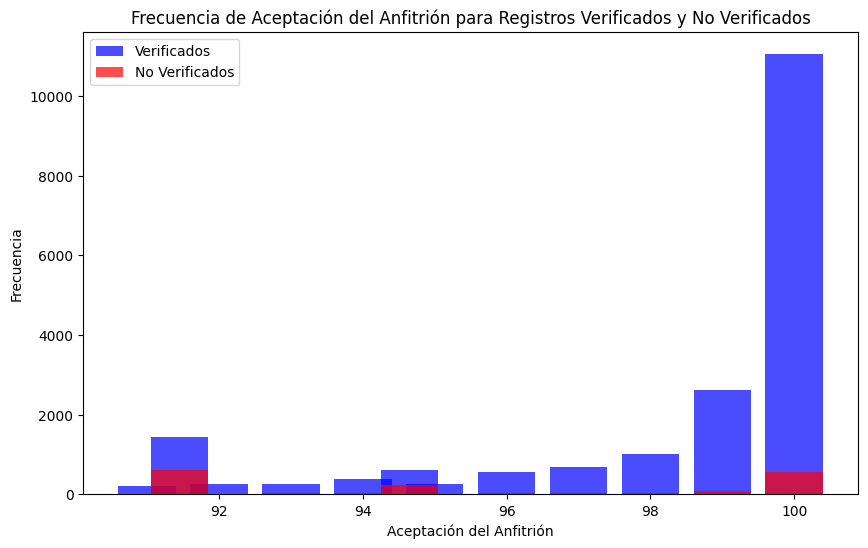

In [52]:
# Filtrar el DataFrame para incluir solo registros verificados y aceptación mayor a 90
verificados = mex3[(mex3["host_identity_verified"] == "t") & (mex3["host_acceptance_rate"] > 90)]
no_verificados = mex3[(mex3["host_identity_verified"] == "f") & (mex3["host_acceptance_rate"] > 90)]

# Crear una figura con subplots
fig, ax = plt.subplots(figsize=(10, 6))

# Crear tablas de frecuencias de aceptación del anfitrión para los registros verificados y no verificados
freq_table_verificados = verificados["host_acceptance_rate"].value_counts()
freq_table_no_verificados = no_verificados["host_acceptance_rate"].value_counts()

# Crear histogramas de los resultados para verificados y no verificados
ax.bar(freq_table_verificados.index, freq_table_verificados, color='blue', alpha=0.7, label='Verificados')
ax.bar(freq_table_no_verificados.index, freq_table_no_verificados, color='red', alpha=0.7, label='No Verificados')

ax.set_title("Frecuencia de Aceptación del Anfitrión para Registros Verificados y No Verificados")
ax.set_xlabel("Aceptación del Anfitrión")
ax.set_ylabel("Frecuencia")
ax.legend()

plt.show()


Precio y rating de la casa

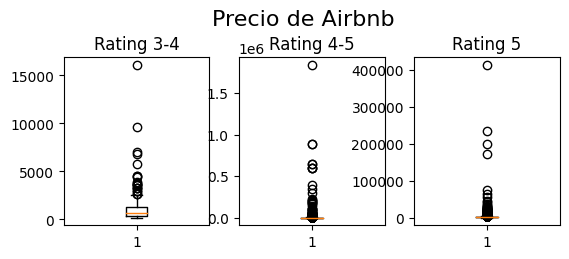

In [53]:
#Creamos categorías de rating
rat0 = mex3[mex3["review_scores_rating"] < 1]
rat1 = mex3[(mex3["review_scores_rating"] >= 1) & (mex3["review_scores_rating"] < 2)]
rat2 = mex3[(mex3["review_scores_rating"] >= 2) & (mex3["review_scores_rating"] < 3)]
rat3 = mex3[(mex3["review_scores_rating"] >= 3) & (mex3["review_scores_rating"] < 4)]
rat4 = mex3[(mex3["review_scores_rating"] >= 4) & (mex3["review_scores_rating"] < 5)]
rat5 = mex3[(mex3["review_scores_rating"] >= 5) & (mex3["review_scores_rating"] < 6)]

# rat0, rat1 y rat2 no tienen datos

plt.subplot(231)
plt.boxplot(rat3["price"])
plt.title("Rating 3-4")

plt.subplot(232)
plt.boxplot(rat4["price"])
plt.title("Rating 4-5")

plt.subplot(233)
plt.boxplot(rat5["price"])
plt.title("Rating 5")

plt.suptitle("Precio de Airbnb", fontsize=16)

plt.show()

Calificación de la comunicación y efectividad de la respuesta del host

Text(0, 0.5, 'Calificación de la comunicación')

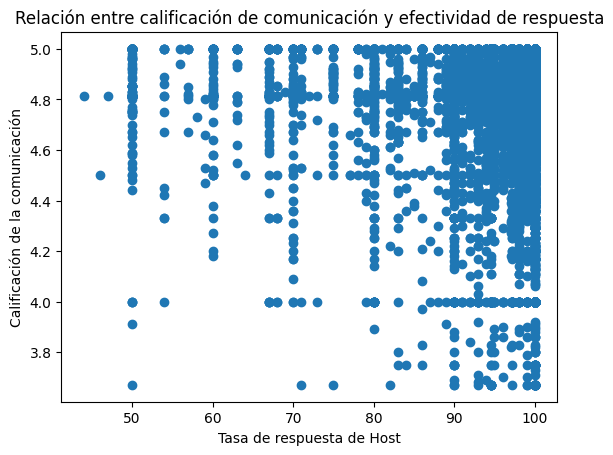

In [54]:
#review_scores_communication y host_response_rate
plt.scatter(mex3["host_response_rate"], mex3["review_scores_communication"])
plt.title("Relación entre calificación de comunicación y efectividad de respuesta")
plt.xlabel("Tasa de respuesta de Host")
plt.ylabel("Calificación de la comunicación")

Tipo de propiedad con número de recamaras

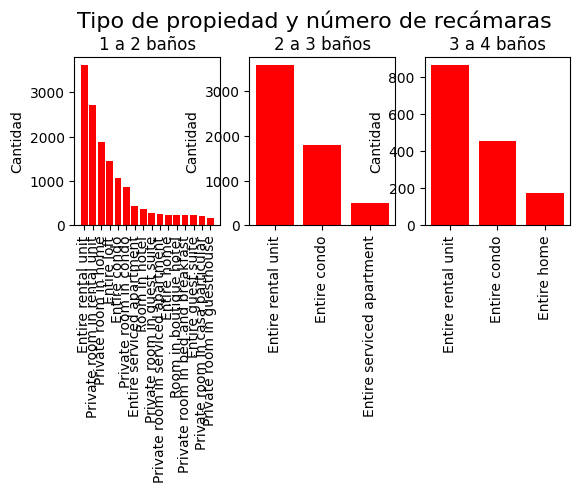

In [66]:
#Categorías por bedrooms

bed1 = mex3[(mex3["bedrooms"] >= 1) & (mex3["bedrooms"] < 2)]
bed2 = mex3[(mex3["bedrooms"] >= 2) & (mex3["bedrooms"] < 3)]
bed3 = mex3[(mex3["bedrooms"] >= 3) & (mex3["bedrooms"] < 4)]
bed4 = mex3[(mex3["bedrooms"] > 5)]

plt.subplot(231)
property_counts = bed1["property_type"].value_counts()
property_counts_filtered = property_counts[property_counts > 150]
plt.bar(property_counts_filtered.index, property_counts_filtered.values, color = "red")
plt.ylabel("Cantidad")
plt.title("1 a 2 baños")
plt.xticks(rotation=90)

plt.subplot(232)
property_counts = bed2["property_type"].value_counts()
property_counts_filtered = property_counts[property_counts > 150]
plt.bar(property_counts_filtered.index, property_counts_filtered.values, color = "red")
plt.ylabel("Cantidad")
plt.title("2 a 3 baños")
plt.xticks(rotation=90)

plt.subplot(233)
property_counts = bed3["property_type"].value_counts()
property_counts_filtered = property_counts[property_counts > 150]
plt.bar(property_counts_filtered.index, property_counts_filtered.values, color = "red")
plt.ylabel('Cantidad')
plt.title("3 a 4 baños")
plt.xticks(rotation=90)

plt.suptitle("Tipo de propiedad y número de recámaras", fontsize=16)

plt.show()


Reviews de cada lugar

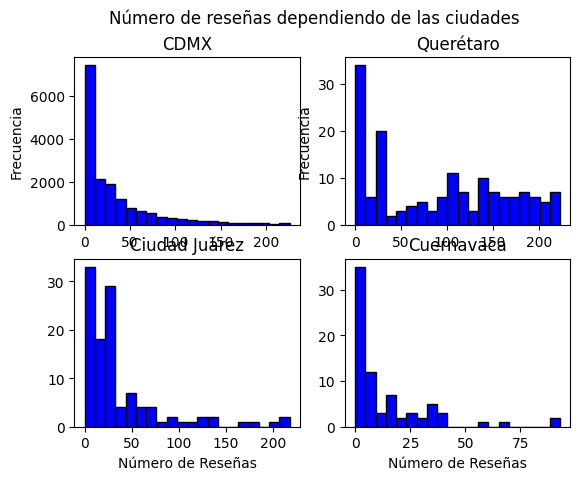

In [102]:
#reviews_per_month
#host_location
mex3["host_location"].value_counts()

cdmx_df = mex3[(mex3["host_location"] == "Mexico City, Mexico") | (mex3["host_location"] == "Mexico") | (mex3["host_location"] == "Federal District, Mexico") | (mex3["host_location"] == "Ciudad de Mexico, Mexico")]
queretaro_df = mex3[mex3["host_location"] == "Santiago de Querétaro, Mexico"]
juarez_df = mex3[mex3["host_location"] == "Naucalpan de Juárez, Mexico"]
cuerna_df = mex3[mex3["host_location"] == "Cuernavaca, Mexico"]

plt.subplot(221)
plt.hist(cdmx_df["number_of_reviews"], bins=20, color='blue', edgecolor='black')
plt.title("CDMX")
plt.ylabel("Frecuencia")

plt.subplot(222)
plt.hist(queretaro_df["number_of_reviews"], bins=20, color='blue', edgecolor='black')
plt.title("Querétaro")
plt.ylabel("Frecuencia")

plt.subplot(223)
plt.hist(juarez_df["number_of_reviews"], bins=20, color='blue', edgecolor='black')
plt.title("Ciudad Juárez")
plt.xlabel("Número de Reseñas")

plt.subplot(224)
plt.hist(cuerna_df["number_of_reviews"], bins=20, color='blue', edgecolor='black')
plt.title("Cuernavaca")
plt.xlabel("Número de Reseñas")

plt.suptitle("Número de reseñas dependiendo de las ciudades")

plt.show()
